In [ ]:
import pandas as pd
df = pd.read_csv('/content/AirPassengers.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df['Month'] = pd.to_datetime(df['Month'])
df.set_index(df["Month"], inplace = True)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
ts = df['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [ ]:
min(ts)

104

In [ ]:
ts['1949-01-01']

112

In [ ]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

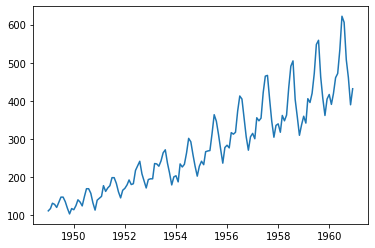

In [ ]:
plt.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stat(timeseries):
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()
  plt.plot(timeseries, color = 'blue',label = 'original')
  plt.plot(rolmean, color = 'black', label = 'Rolling mean')
  plt.plot(rolstd, color = 'red', label = 'Rolling std')
  plt.legend(loc = 'best')
  plt.title('Rolling mean & standard deviation')
  plt.show()
  print('Results from DF Test: ')
  dftest = adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics','p-value','#lags used','# of observation used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


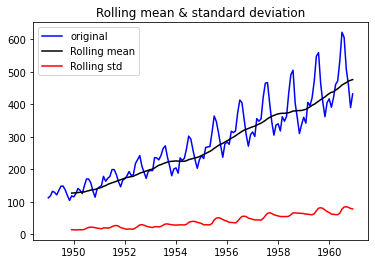

Results from DF Test: 
Test Statistics            0.815369
p-value                    0.991880
#lags used                13.000000
# of observation used    130.000000
Critical Value (1%)       -3.481682
Critical Value (5%)       -2.884042
Critical Value (10%)      -2.578770
dtype: float64


In [ ]:
test_stat(ts)

In [ ]:
#Trend:
# transformation - log, sq rt, cube root, etc.

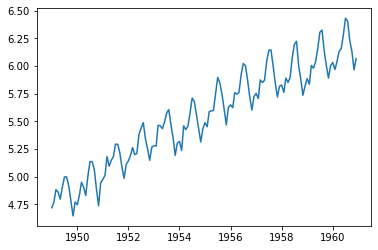

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

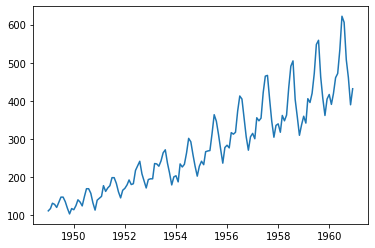

In [ ]:
plt.plot(ts)

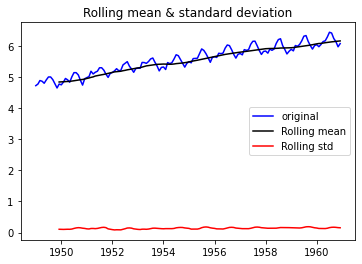

Results from DF Test: 
Test Statistics           -1.717017
p-value                    0.422367
#lags used                13.000000
# of observation used    130.000000
Critical Value (1%)       -3.481682
Critical Value (5%)       -2.884042
Critical Value (10%)      -2.578770
dtype: float64


In [ ]:
test_stat(ts_log) # tansformed 

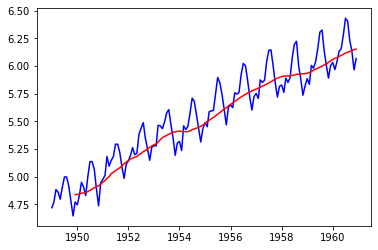

In [ ]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log, color = 'blue')
plt.plot(moving_avg, color = 'red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace= True)
ts_log_moving_avg_diff.head(14)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
Name: #Passengers, dtype: float64

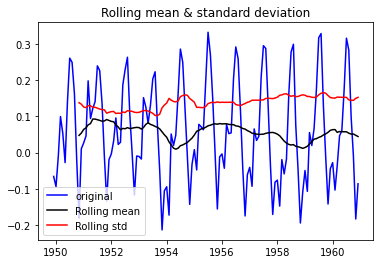

Results from DF Test: 
Test Statistics           -3.162908
p-value                    0.022235
#lags used                13.000000
# of observation used    119.000000
Critical Value (1%)       -3.486535
Critical Value (5%)       -2.886151
Critical Value (10%)      -2.579896
dtype: float64


In [ ]:
test_stat(ts_log_moving_avg_diff)

In [ ]:
#seasonality with trend now:
#differencing: cur-pre

ts_log_diff = ts_log - ts_log.shift()

In [ ]:
ts_log_diff.dropna(inplace = True)

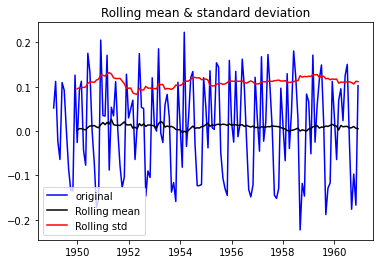

Results from DF Test: 
Test Statistics           -2.717131
p-value                    0.071121
#lags used                14.000000
# of observation used    128.000000
Critical Value (1%)       -3.482501
Critical Value (5%)       -2.884398
Critical Value (10%)      -2.578960
dtype: float64


In [ ]:
test_stat(ts_log_diff)

In [ ]:
-2.71 < -2.88

False

In [ ]:
ts_log_diff.head(10)

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
Name: #Passengers, dtype: float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


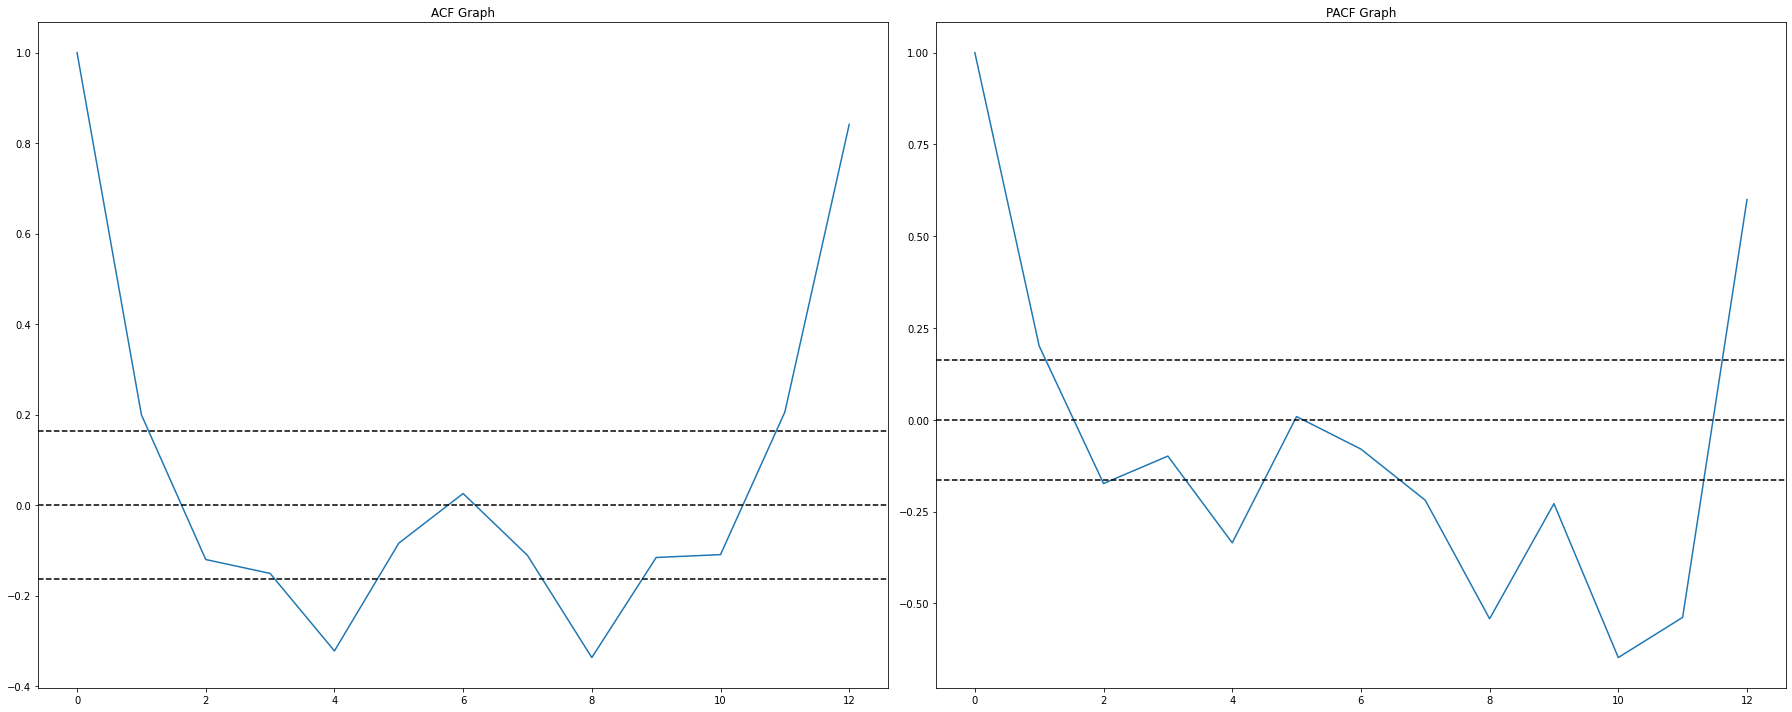

In [ ]:
plt.figure(figsize = (25,10))
lag_acf = acf(ts_log_diff, nlags = 12)
lag_pacf = pacf(ts_log_diff, nlags=12, method= 'ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.title('ACF Graph')

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y = -1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y = 1.96/np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'black')
plt.title('PACF Graph')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 1.0, 'RSS: 1.0292')

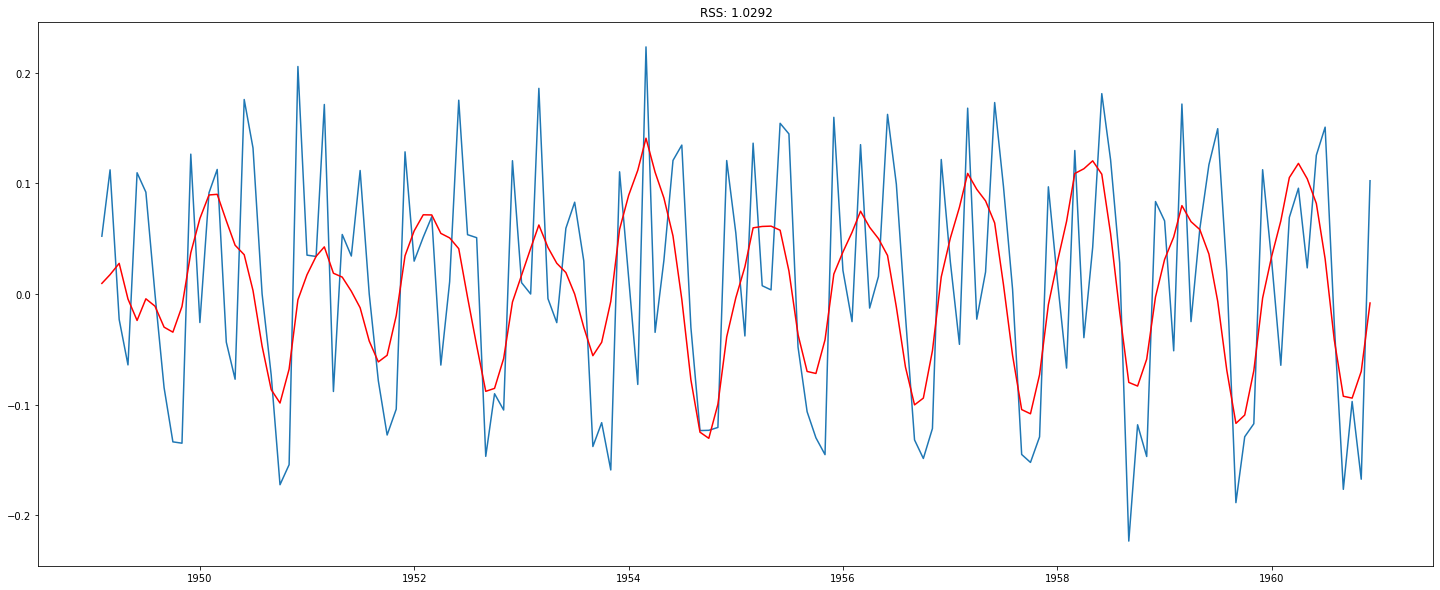

In [ ]:
#apply ARIMA model:
model = ARIMA(ts_log, order = (2,1,2))
plt.figure(figsize = (25,10))
results_arima = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_arima.fittedvalues - ts_log_diff)**2))

In [ ]:
#final prediction:
pred_arima_diff = pd.Series(results_arima.fittedvalues, copy = True)
print(pred_arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [ ]:
pred_arima_diff_cumsum = pred_arima_diff.cumsum()
print(pred_arima_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


Text(0.5, 1.0, 'RMSE: 90.1046')

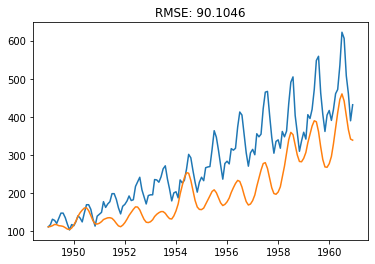

In [ ]:
pred_arima_log = pd.Series(ts_log.iloc[0], index = ts_log.index)

pred_arima_log = pred_arima_log.add(pred_arima_diff_cumsum, fill_value = 0)

#convert back to original:
pred_arima = np.exp(pred_arima_log)
plt.plot(ts)
plt.plot(pred_arima)
plt.title('RMSE: %.4f'%np.sqrt(sum((pred_arima -ts)**2/len(ts))))